In the given dataset, we have Customer_Id, Gender, Age, Annual Income ($), and Spending Score (which is the calculated value of how much a customer has spent in the mall, the more the value, the more he has spent). From this dataset, we need to calculate some patterns, as it is an unsupervised method, so we don't know what to calculate exactly.

# Import Dataset

In [2]:
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
import pandas as pd
A = pd.read_csv("/Users/ABC/Downloads/Mall_Customers.csv")

# Data Profiling

In [4]:
A.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Data Pre-processing

In [5]:
A.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# K-Means Clustering based on Age 

In [6]:
Q = A[["Age","Spending Score (1-100)"]]
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Q1 = pd.DataFrame(ss.fit_transform(Q),columns=Q.columns)

In [7]:
Q1

,Age,Spending Score (1-100)
0,-1.424569,-0.434801
1,-1.281035,1.195704
2,-1.352802,-1.715913
3,-1.137502,1.040418
4,-0.563369,-0.395980
...,...,...
195,-0.276302,1.118061
196,0.441365,-0.861839
197,-0.491602,0.923953
198,-0.491602,-1.250054


In [8]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4)
model = km.fit(Q1)
model.labels_


array([3, 1, 3, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 3, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 2, 1, 2, 1,
       0, 1, 2, 3, 3, 3, 2, 1, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3,
       2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3,
       1, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 1, 1, 3, 1, 0, 1, 0, 1, 0, 1,
       3, 1, 3, 1, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1, 2, 1, 3, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 3, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 3, 1, 0, 1, 3, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1,
       3, 1])

In [9]:
k = range(2,20)
Wcss = []
for i in k:
    km = KMeans(n_clusters=i)
    model = km.fit(Q1)
    Wcss.append(model.inertia_)
    

In [10]:
Wcss

[189.3874903399244,
 124.33553836009898,
 89.76521676586151,
 71.0936414145941,
 53.12843835629399,
 45.903798612012075,
 39.20565442024497,
 33.75048299358161,
 28.80289227975427,
 25.4234332992907,
 23.356260696409116,
 21.528209281252646,
 19.685927604871456,
 18.576354606009378,
 16.647541418591235,
 15.850439004625663,
 14.337122361891474,
 13.409002528792453]

Text(0.5, 1.0, 'Ellbow curve')

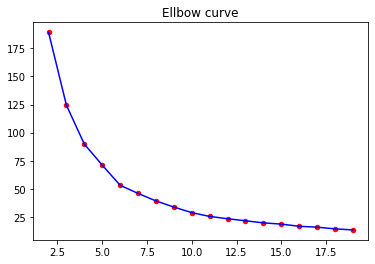

In [11]:
import matplotlib.pyplot as plt
plt.scatter(k,Wcss,s=20,c="red")
plt.plot(k,Wcss,c="blue")
plt.title("Ellbow curve")

# K-Means Clustering based on Annual Income

In [16]:
Q = A[["Annual Income (k$)","Spending Score (1-100)"]]
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Q1 = pd.DataFrame(ss.fit_transform(Q),columns=Q.columns)

In [17]:
k = range(1,11)
Wcss = []
for i in k:
    km = KMeans(n_clusters=i,init='k-means++',random_state=41)
    model = km.fit(Q1)
    Wcss.append(model.inertia_)
    

In [18]:
Wcss

[399.99999999999994,
 270.70426664306717,
 157.70400815035939,
 108.92131661364358,
 65.56840815571681,
 55.057348270385965,
 46.856387684895765,
 37.19778691869562,
 32.37525368158289,
 29.090568897369714]

Text(0.5, 1.0, 'ellbow curve')

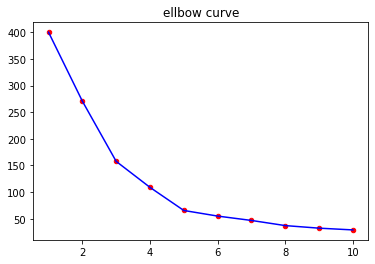

In [19]:
import matplotlib.pyplot as plt
plt.scatter(k,Wcss,s=20,c="red")
plt.plot(k,Wcss,c="blue")
plt.title("ellbow curve")